In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

## Import Data Field

In [2]:
#input path change to current path
input_path = "C:/Users/Lindsey/Desktop/Daily-Bruin/the-stack/datasets/student-demographics-hsis/"

In [3]:
#import file NOTE HAD TO ADD INDEX IN CSV
df = pd.read_csv(input_path + "DOEGrantMoneyPerCampusPerYear.csv", encoding="ISO-8859-1",  index_col=0)

In [7]:
df.head(15) #see data

,Year,Campus,Number of Awards,Dollar Amount of Awards
Index,,,,
1,2005-06,Riverside,2,570371
2,2005-06,Davis,3,738838
3,2005-06,Santa Barbara,5,740236
4,2005-06,Irvine,7,1110897
5,2005-06,San Diego,4,1141138
6,2005-06,Santa Cruz,3,2382488
7,2005-06,Los Angeles,14,4504376
8,2005-06,Merced,0,0
9,2005-06,Berkeley,0,0


## Sort Data

In [8]:
#Testing sorting abilities
df_sorted = df[df["Campus"] == "Berkeley"]
df_sorted.head(15)

,Year,Campus,Number of Awards,Dollar Amount of Awards
Index,,,,
9,2005-06,Berkeley,0,0
11,2006-07,Berkeley,1,1112552
22,2007-08,Berkeley,3,3172182
29,2008-09,Berkeley,2,344598
37,2009-10,Berkeley,1,20650
54,2010-11,Berkeley,0,0
55,2011-12,Berkeley,1,343066
71,2012-13,Berkeley,0,0
80,2013-14,Berkeley,0,0


In [9]:
#Testing making lists
L = list(df_sorted["Dollar Amount of Awards"])
L2 = list(df_sorted["Year"])
print(L, L2)

[0, 1112552, 3172182, 344598, 20650, 0, 343066, 0, 0, 0, 0, 0, 0, 0, 0] ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']


In [10]:
def DollarAwards(Input):
    '''
    Takes data field, sorts by entry, makes a list of 2 columns, zips columns together
    Parameter, sort entry
    '''
    df_sorted = df[df["Campus"] == Input ]
    Dollars = tuple(df_sorted["Dollar Amount of Awards"])
    Years = tuple(df_sorted["Year"])
    return tuple(zip(Years, Dollars))

In [11]:
#test
print(DollarAwards("Berkeley"))

(('2005-06', 0), ('2006-07', 1112552), ('2007-08', 3172182), ('2008-09', 344598), ('2009-10', 20650), ('2010-11', 0), ('2011-12', 343066), ('2012-13', 0), ('2013-14', 0), ('2014-15', 0), ('2015-16', 0), ('2016-17', 0), ('2017-18', 0), ('2018-19', 0), ('2019-20', 0))


In [12]:
#List of campuses for reference
Campuses = ("Berkeley", "Davis", "Irvine", "Los Angeles", "Merced","Riverside","San Diego","Santa Cruz", "Santa Barbara")
#Create a dictionary with campuses as keys and zipped tuple as value
d={}
for campus in Campuses:
    d[campus] = DollarAwards(campus)
print(d["Santa Barbara"]) #test

(('2005-06', 740236), ('2006-07', 1276720), ('2007-08', 336040), ('2008-09', 964394), ('2009-10', 631804), ('2010-11', 649588), ('2011-12', 662497), ('2012-13', 177688), ('2013-14', 173926), ('2014-15', 0), ('2015-16', 0), ('2016-17', 50954), ('2017-18', 232264), ('2018-19', 242135), ('2019-20', 13131513))


## Create JSON

In [16]:
import json
def tojson(Input):
    '''
    Start with a key in a dictionary, make a tuple that is equal to dict value, convert to json
    '''
    tuple = d[Input]
    with open('DOE' + Input + '.json', 'w') as json_file:
        json.dump(tuple, json_file, sort_keys=True, indent=4)

In [17]:
#Loop create jsons for each campus
for item in d.keys():
    tojson(item)

## Test Visuals

In [21]:
def VizAwards(Input):
    df_sorted = df[df["Campus"] == Input ]
    return df_sorted["Dollar Amount of Awards"]

In [24]:
Campuses = ["Berkeley", "Davis", "Irvine", "Los Angeles", "Merced","Riverside","San Diego","Santa Cruz", "Santa Barbara"]
dViz={}
for campus in Campuses:
    dViz[campus] = VizAwards(campus)

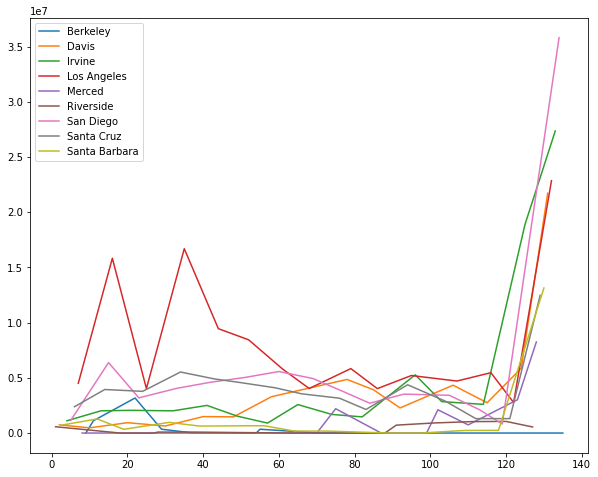

In [25]:
plt.figure(figsize=(10, 8))
for item in d.keys():
    plt.plot(dViz[item], label = item)
plt.legend()

In [ ]:
#Extra Code Bits
for row in df_sorted:
        AwardList.append(df_sorted["Dollar Amount of Awards"][row])
        
#    for year in d[item]:
        #plt.plot(year[0],year[1], label = item)
#plt.plot(YearList, DollarsBerkeley, label= "Berkeley")
#plt.plot(DollarsSanBar, label= "Santa Barbara")
#plt.legend()